# AST 502 Project 1: Application of multiple dimensionality-reduction techniques to PSF estimation in high-constrast imaging

## Ryan Boyden, Joseph Long, Samuel Wyatt, Minghao Yue

## Chapter 7



## Some quick logistics:

To run this notebook:
1. download the project on github (insert link)
2. enter the 'pyklip' directory and run 'pyklip setup.py develop'
3. go back to the main project directory and open up the notebook with Jupyter

## Outline
- Review of Dimensionality Reduction (Ryan?) 
    - The "curse of dimensionality"
    - PCA
- PCA in high-contrast imaging (Joseph?)
    - Intuition for its utility
    - functional form
- Examples with GPI data (Sam, Minghao, and some of Ryan+Joseph?)
    - ALICE arhival project
    - algorithms: KLIP, LOCI, etc 

## Recall: how hard is it to find your dream car?

![](https://buyersguide.caranddriver.com/media/assets/submodel/8057.jpg)

## In terms of a probablility...

The only criteria for your dream car is that it is a **Lamborghini**. For this thought experiment, assume that 10 % of the cars on the market are Lamborghinis. 

The Probability of finding your dream car is: 

$$ P(car = dream) = P(lambo) = 0.1 $$ 

Now imagine that you're picky and want a **2017 yellow Lamborghini with a spoiler and tinted windows**. 

If we assume that the probability of each specified parameter (i.e. dimension)  is 10 %, then the chances of finding your dream car is: 

$$ P(car = dream) = P(lambo) * P(2017) * P(yellow) 
                         * P(spoiler) * P(tint) = \bf{10^{-5}} $$

--> **_The curse of dimensionality_**

### Recall the "unit sample volume"...

![http://www.newsnshit.com/curse-of-dimensionality-interactive-demo/](http://i1.wp.com/www.newsnshit.com/wp-content/uploads/2014/10/580f1__Curse-of-dimensionality-620x549.png?resize=620%2C549)

The probability lowers with increasing dimension

(Richards 2016)

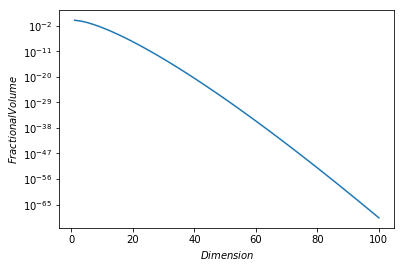

In [2]:
#curse of dimensionality
## in the limit of many dimensions, the chances of identifying 
## a data point within a unit sample volume will be zero!

%matplotlib inline
import numpy as np
import scipy.special as sp
from matplotlib import pyplot as plt

def fractionVol(dimension):
    return (np.pi**(dimension/2.))/(dimension*2.**(dimension-1.)*sp.gamma(dimension/2.))

dim = np.linspace(1,100)

#------------------------------------------------------------
# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dim,fractionVol(dim))

ax.set_yscale('log')
ax.set_xlabel('$Dimension$')
ax.set_ylabel('$Fractional Volume$')

plt.show()

## Principal Component Analysis (PCA) 
- A dimensionality reduction technique that uses an orthogonal transformation to convert a set of observations of possibly **correlated** variables into a set of values of **linearly uncorrelated** variables called **principle components**. 
- Principle components are ordered by the variance captured by each new variable 


## Intuition
![](http://www.astroml.org/_images/fig_PCA_rotation_1.png)
(Lvezic Figure 7.2)
- Picture a bivariate Gaussian that is not aligned with the axes it is initially defined on. Here $x$ and $y$ are a set of correlated variables, in this case, axes. PCA identifies a new set of (orthogonal) axes that are uncorrelated, shown as $x^{\prime}$ and $y^{\prime}$.
- The principal components are orthogonal and aligned along the directions of **maximal variance with zero covariance**
    


![](http://www.astroml.org/_images/fig_PCA_rotation_1.png)

For the plot above..
  - first component $\Longleftrightarrow$ maximal variance
  - second component $\Longleftrightarrow$ maximal residual variance
Where does dimensionality reduction comes into play? 
  - The physically significant information about our data could only be along the $x^{\prime}$ axis, and the $y^{\prime}$ axis, if it's variance is small, could just be noise. Thus, we could toss the information from this second component, obtain cleaner data, and reduce the dimensionality of our problem.
  - Each principle component might correspond to a different physical effect (i.e. a star and a planet), so we could isolate, linearly, different physical effects on our data.

  
  
  

## (A review of) the formal PCA derivation

Consider a data set $\{x_i\}$ which consists of $N$ objects for which we measure $K$ features (for the bivariate Gaussian, we measured $x$ and $y$).  '

The covariance of the centered data matrix $X$ is 
$$C_X=\frac{1}{N-1}X^TX$$


PCA wishes to identify a projection of $X$, with projection operator $R$, that is aligned with the directions of maximal variance. We express this projection as $Y= X R$ with covariance 

$$ C_{Y} = \frac{1}{N-1}Y^T Y= \frac{1}{N-1} R^T X^T X R = R^T C_X R$$


$r_1$ is the first principal component of $R$, subject to the normalization constraint: $r_1^T r_1 = 1$. When the data $X$ is projected onto $r_1$, the variance is maximized. 

Formally, we can derive $r_1$ by using Langrange multipliers with the following cost function:

$$ \phi(r_1,\lambda_1) = C_Y - \lambda_1(r_1^Tr_1-1) = r_1^TC_X r_1 - \lambda_1(r_1^Tr_1-1). $$

We maximize $\phi(r_1,\lambda)$ by taking the derivative with respect to $r_1$ and set it to 0. We then have

$$ C_Xr_1 - \lambda_1 r_1 = 0. $$

This resembles an eigenvalue equation: $ C_Xr_1 = \lambda_1 r_1$. 

The second and further principal compents are derived in an analogous manner, with the additional orthogonality constraint to the cost function (e.g . $r_i^T r_j = 0$).

Thus, the eigenvectors of $C_X$ correspond to the projections of maximum variance, where the eigenvalues denote the magnitude of the variance along each component.

## Astrophysical applications of PCA 

- Astrophysics 
    - LAST TIME: Decompose spectra of various sources into different principal components (continuum slope, emission/absorption features, and noise)
        - creates spectral templates
    - This Time: High-constrast imaging 
        - imaging planets and disks by "removing" the star


## High-contrast imaging

- Imaging the close vicinity of bright (stellar) objects to look for other objects with a high constrast ratio with respect the bright (stellar) object

- How it works: use PCA to determine and subtract the PSF of the bright (stellar) object from the image to isolate dimmer objects

# or a better image (talk throught the figure)

![](https://visao.as.arizona.edu/wp-content/uploads/2015/06/vapp_pr_fig1.png)

(Snik, Kenworthy, & Males 2015)



## Walkthrough of  high-contrast imaging steps
(probably wrong but just want to get the outline together)
For direct imaging of exoplanets and protoplanetary disks)
1. Observe region with coronagraph
    - decent amount of starlight suppresion
2. Invoke a PCA algorithm to determine the remaining stellar PSF and remove it from the image
    - KLIP, LOCI, etc.
3. Observe the result!

## Why PCA

Observations of high-contrast imaging, $T$, are represented as

$$ T(n) = I_{{\psi}_0}(n) + \epsilon A(n), $$

where $I_{{\psi}_0}$ represents the stellar PSF; $A$ represents a faint astronomical symbol which may ($\epsilon = 1$) or may not ($\epsilon = 0$) be present; $n$ denotes the compressed pixel index.

The goal of PSF subtraction is to reconstruct $I_{{\psi}_0}$ using a set of reference PSFs $\{ R_k (n) = I_{{\psi}_k}(n)\} _{k = 1...K}$, and then to subtract it from the target image to determing A(n).

### PCA is the superior technique for image reconstruction:
   1. create a covariance matrix of the reference PSFs
   2. identify the principle components with the eigenvalue equation
   3. identify the set of coordinates to reconstruct the observed PSF from the principle components of the reference PSFs


## Some comment on the algorithms? i.e. how they are more complicated than just computing the covariance matrix of the reference image? Or maybe we show this?

## Example: Imaging a planet with pyKLIP

We'll be working with the Beta Pictoris system. 
   - Star: debris disk A-type main sequence 
   - One confimed giant planet
      - Mass ~ 7 Jupiter Masses
      - Radius ~ 1.5 Jupiter Radius
      - Orbital Radius ~ 9 AU (1.5x Jupiter's Orbit)
   - Distance ~ 20 pc

Our data was obtained with GPI (Gemini Planet Imager), located on Mauna Kea. 
   
Below is an artist's interpretation:
![](https://upload.wikimedia.org/wikipedia/commons/1/12/Artist%E2%80%99s_impression_of_the_planet_Beta_Pictoris_b.jpg)
Let's use pyKLIP to remove the stellar PSF and see what the planet looks like!

In [1]:
## from pyklip.examples.BasicKLIPTutorial
#intial importing
import glob
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import astropy.io.fits as fits
import IPython.html.widgets as widgets


/Users/ryanboyden/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:

import pyklip.parallelized as parallelized
import pyklip.instruments.GPI as GPI

## Acquire example files

filelist = glob.glob("pyklip/tests/data/S20131210*distorcorr.fits")
filelist.sort()

print(filelist)

dataset = GPI.GPIData(filelist, highpass=True)

['pyklip/tests/data/S20131210S0092_spdc_distorcorr.fits', 'pyklip/tests/data/S20131210S0099_spdc_distorcorr.fits', 'pyklip/tests/data/S20131210S0111_spdc_distorcorr.fits']
Reading File: pyklip/tests/data/S20131210S0092_spdc_distorcorr.fits
Reading File: pyklip/tests/data/S20131210S0099_spdc_distorcorr.fits
Reading File: pyklip/tests/data/S20131210S0111_spdc_distorcorr.fits


In [6]:
## from pyklip.examples.BasicKLIPTutorial 
## do the KLIP algorithm

outputdir = "ryan_example_output_data" # save files here
prefix = "pyklip-betpic-j-131210-k100a9s4m1" # a file prefix to summarize this reduction

parallelized.klip_dataset(dataset, outputdir=outputdir, fileprefix=prefix,
                          annuli=9, subsections=4, movement=1, numbasis=[1,20,50,100],
                          calibrate_flux=True, mode="ADI+SDI")

Beginning ADI+SDI KLIP
Begin align and scale images for each wavelength
Wavelength 1.128 with index 1 has finished align and scale. Queuing for KLIP
Wavelength 1.139 with index 3 has finished align and scale. Queuing for KLIP
Wavelength 1.157 with index 6 has finished align and scale. Queuing for KLIP
Wavelength 1.133 with index 2 has finished align and scale. Queuing for KLIP
Wavelength 1.151 with index 5 has finished align and scale. Queuing for KLIP
Wavelength 1.163 with index 7 has finished align and scale. Queuing for KLIP
Wavelength 1.145 with index 4 has finished align and scale. Queuing for KLIP
Wavelength 1.11 with index 0 has finished align and scale. Queuing for KLIP
Wavelength 1.169 with index 8 has finished align and scale. Queuing for KLIP
Wavelength 1.174 with index 9 has finished align and scale. Queuing for KLIP
Wavelength 1.187 with index 11 has finished align and scale. Queuing for KLIP
Wavelength 1.181 with index 10 has finished align and scale. Queuing for KLIP
Wav

In [3]:
## Let's see what are results look like 
##showing the continuum for different KL modes:
outputdir = "ryan_example_output_data" # save files here
prefix = "pyklip-betpic-j-131210-k100a9s4m1"

kl_hdulist = fits.open("{out}/{pre}-KLmodes-all.fits".format(out=outputdir, pre=prefix))
klcube = kl_hdulist[1].data
klheader = kl_hdulist[1].header
print("The dimensions of this datacube is {0}".format(klcube.shape))

# reconstruct the KL Mode cutoff axis from the header. 
num_cutoffs = klcube.shape[0] # number of KL mode cutoffs saved
kl_cutoffs = [klheader['KLMODE{0}'.format(cutoff_i)] for cutoff_i in range(num_cutoffs) ] # grab all the KL mode cutoffs from the header

def pltcube(selected_kl_index):
    """
    Function to refresh the plot with the frame from the selected_kl_index
    
    Args:
        selected_wv: the datacube index selected by the widget
    """
    plt.figure(figsize=(8,8))
    plt.imshow(klcube[selected_kl_index], cmap='viridis', vmin=-5e-7, vmax=1e-5)
    plt.gca().invert_yaxis() # flip the y axis so that [0,0] is in the bottom left corner. 
    plt.title("{0} KL Modes".format(kl_cutoffs[selected_kl_index]), fontsize=20)
    plt.show()
    
widgets.interact(pltcube, selected_kl_index=(0, num_cutoffs-1, 1))


The dimensions of this datacube is (4, 281, 281)


<function __main__.pltcube>

In [4]:
## to look at one spectral cube

# Read in the data and grab the data from the HDU card in index 1
spec_hdulist = fits.open("{out}/{pre}-KL20-speccube.fits".format(out=outputdir, pre=prefix))
speccube_kl20 = spec_hdulist[1].data
specheader_kl20 = spec_hdulist[1].header
print("The dimensions of this datacube is {0}".format(speccube_kl20.shape))

# reconstruct the wavelength axis from the header. 
# We aren't using dataset.wavelength because to plot the widget plot below, we need a linear wavelenght solution
cube_wvs_step = specheader_kl20['CD3_3'] # \Delta \lambda for each wavelength slice of the cube
cube_wvs_min = specheader_kl20['CRVAL3'] # wavelength of slice 0 of the spectral cube
cube_wvs = cube_wvs_min + np.arange(speccube_kl20.shape[0]) * cube_wvs_step #construct the wavelength axis
cube_wvs_max = cube_wvs[-1] # wavelength of last slice of the spectral cube


def pltcube(selected_wv):
    """
    Function to refresh the plot with the frame from the selected_wv
    
    Args:
        selected_wv: the wavelength selected by the interactive slider bar widget
    """
    wv_index = np.argmin(np.abs(selected_wv - cube_wvs)) # get the index into the array corresponding to the wavelength
    plt.figure(figsize=(8,8)) # create the plot. Make it big
    plt.imshow(speccube_kl20[wv_index], cmap='viridis', vmin=-5e-7, vmax=1e-5) # plot the image
    plt.gca().invert_yaxis() # flip the y axis so that [0,0] is in the bottom left corner. 
    plt.title("{0:.3f} microns".format(selected_wv), fontsize=20)
    plt.show()
    
# run the interactive widget
widgets.interact(pltcube, selected_wv=(cube_wvs_min, cube_wvs_max, cube_wvs_step))

The dimensions of this datacube is (37, 281, 281)


<function __main__.pltcube>

In [5]:
##before and after for different modes

preprocessed_data = fits.getdata('pyklip/tests/data/S20131210S0092_spdc_distorcorr.fits')

start = 0
N_steps = preprocessed_data.shape[0]


def plt_preprocessed_cube(index):
    """
    Function to refresh the plot with the frame from the selected_wv
    
    Args:
        selected_wv: the wavelength selected by the interactive slider bar widget
    """
    plt.figure(figsize=(8,8)) # create the plot. Make it big
    plt.imshow(preprocessed_data[index, :, :], cmap='viridis', vmin =np.nanmin(preprocessed_data),
                                        vmax=np.nanmax(preprocessed_data)) # plot the image
    #plt.gca().invert_yaxis() # flip the y axis so that [0,0] is in the bottom left corner. 
    plt.show()


widgets.interact(plt_preprocessed_cube, index=(0, 36, 4))

<function __main__.plt_preprocessed_cube>

## Conclusions
- PCA is a widely used dimensionality reduction technique 
- Exoplanet researchers often use PCA to remove the stellar PSF from coronagraphed images, which allows for direct imaging of exoplanets and debris disks
- Common PCA algorithms in high-contrast imaging: KLIP (pyKLIP), LOCI, etc.

# If you need any slides from the PCA mining lecture just let me kno